#Seven Lions Exercise

In this exercise, you will practice implementing data augmentation techniques on a sample image of a lion. In addition to the original image, you will generate six lions using augmentation. 

We've written the exercise for PyTorch, but you're welcome to use any alternative library for image augmentation you could use. In fact, YOLOv5 uses [Albumentation](https://albumentations.ai/). Refer to this [PyTorch page](https://pytorch.org/vision/main/transforms.html) for more information on PyTorch's data augmentation techniques.

In [ ]:
#Import libraries
import random
from PIL import Image, ImageOps
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import torch
torch.manual_seed(17)
import torchvision.transforms as T

In [ ]:
#Set parameters

plt.rcParams["savefig.bbox"] = 'tight'
torch.manual_seed(0) #for randomly applied transforms

##Lion #1

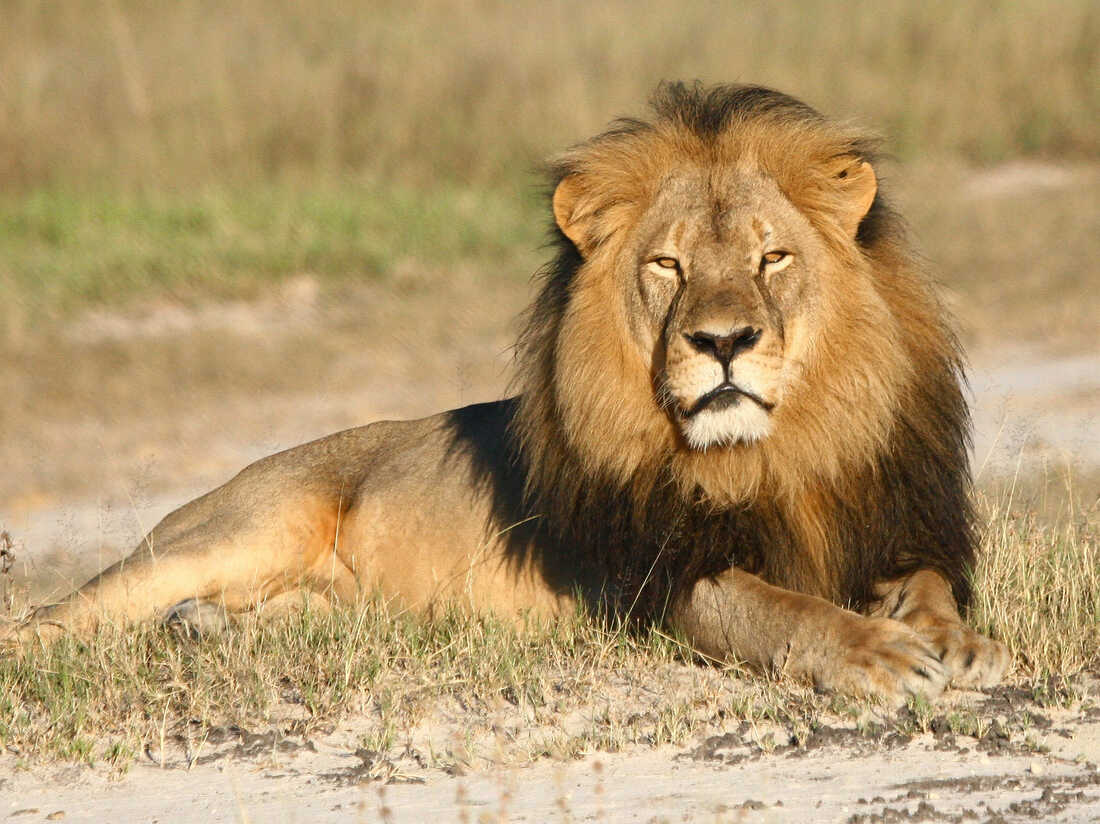

In [ ]:
#Display original image
##Note: Upload the image of the lion to the Session Storage (under Files). You may need to adjust the path.
#Hint: Use .show() to display the image 
img = Image.open('lion.jpg')
img.show()


##Lion #2

In [ ]:
#Display the shape of the image
##Hint: Convert the image to an array using the np.asarray() method
ImageArray = np.asarray(img)
print(ImageArray)
print(f'The Shape of the Image Array is: {ImageArray.shape}')

[[[156 134  85]
  [155 133  84]
  [153 131  82]
  ...
  [168 149 106]
  [168 149 106]
  [170 151 108]]

 [[157 135  86]
  [156 134  85]
  [154 132  83]
  ...
  [168 149 106]
  [168 149 106]
  [169 150 107]]

 [[157 135  86]
  [156 134  85]
  [154 132  83]
  ...
  [168 149 106]
  [168 149 106]
  [169 150 107]]

 ...

 [[222 206 190]
  [220 204 188]
  [219 203 187]
  ...
  [215 203 179]
  [217 202 179]
  [217 201 178]]

 [[224 208 192]
  [222 206 190]
  [221 205 189]
  ...
  [221 208 191]
  [218 202 186]
  [214 197 181]]

 [[226 210 194]
  [227 211 195]
  [226 210 194]
  ...
  [217 203 190]
  [210 194 181]
  [203 185 173]]]
The Shape of the Image Array is: (824, 1100, 3)


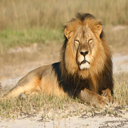

In [ ]:
#Resize the original image to be 128 x 128 
##Hint: Use the Resize transform
Resizeimg = img.resize((128,128))
Resizeimg.save('resized_img.jpg')
Resizeimg.show()


##Lion #3

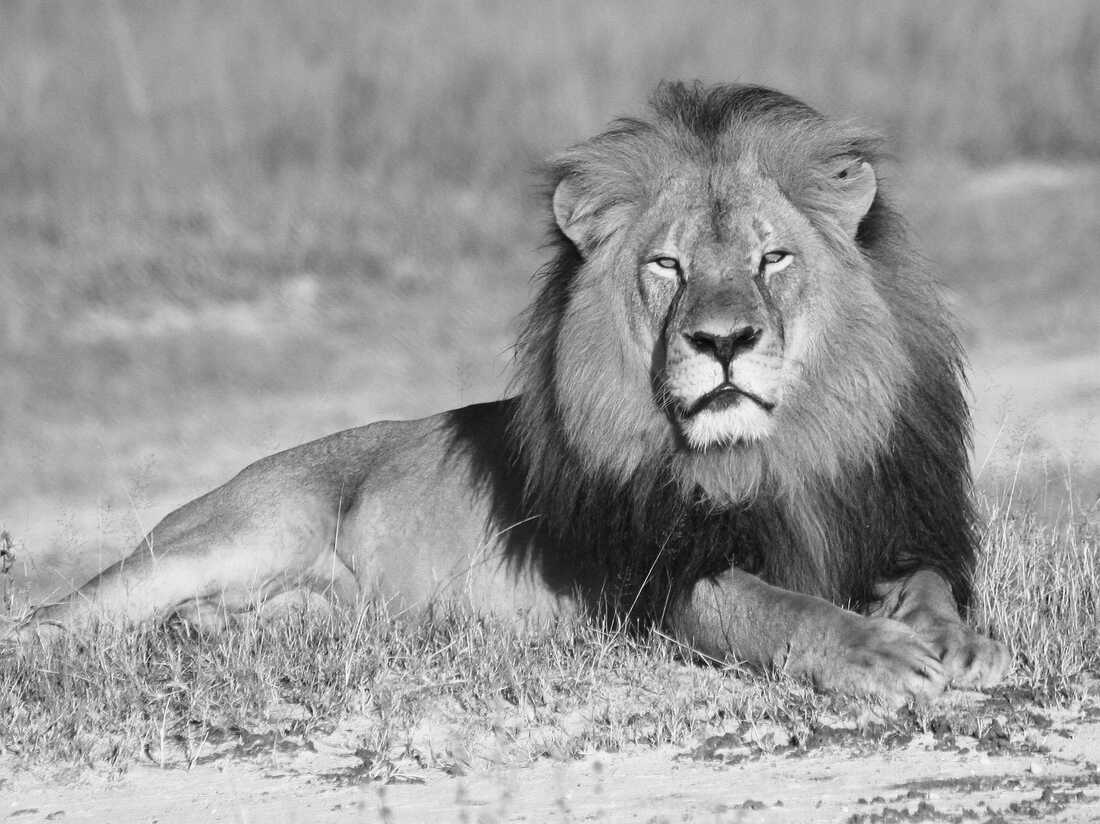

In [ ]:
#Grayscale the original image
''' 
img = img.convert('L') #Convert the image to grayscale
img.save('grayscale_image.jpg') #Save the grayscale image'''

##Hint: Use the Grayscale transform
gray_scale = ImageOps.grayscale(img)
gray_scale.save('gray_image.jpg')
gray_scale.show()

##Lion #4

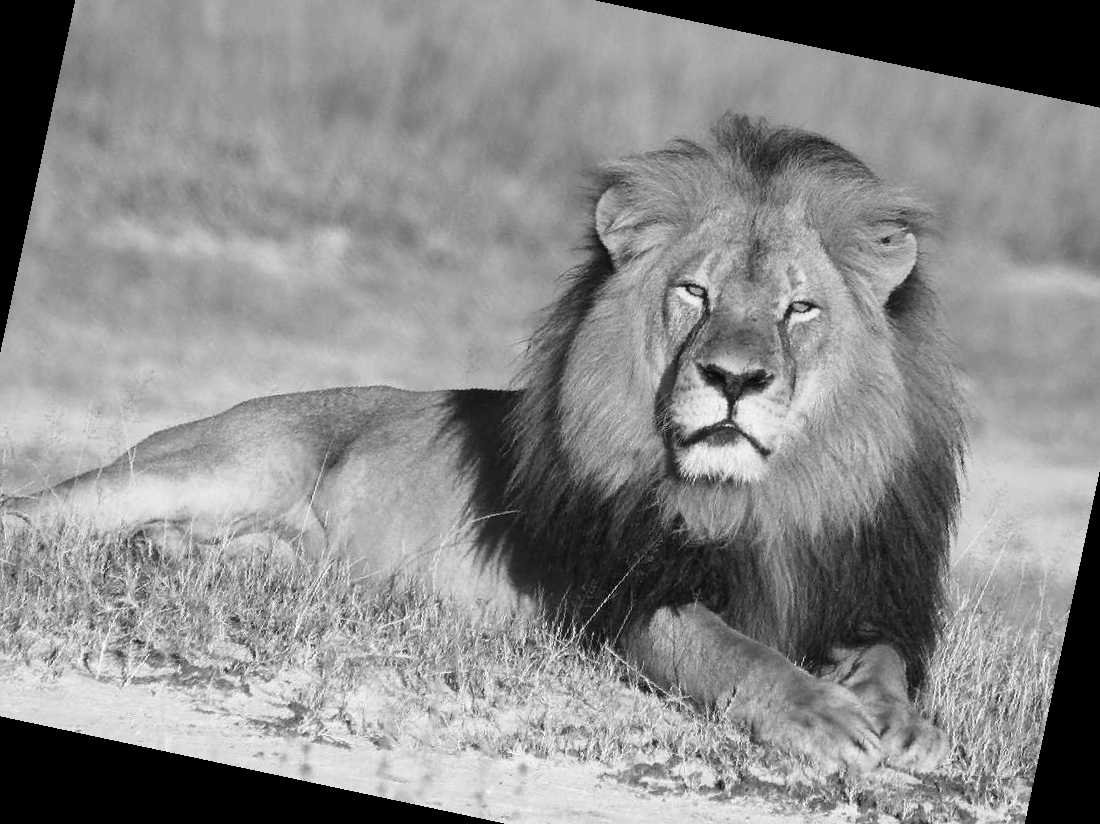

In [ ]:
#Rotate the original image
##Hint: Use the RandomRotation transform
# Generate a random degree between -45 and 45
degree = random.randint(-45, 45)

# Apply the RandomRotation transform
img = img.rotate(degree)

# Save the rotated image
img.save('rotated_image.jpg')

#show the rotated image
img.show()

##Lion #5

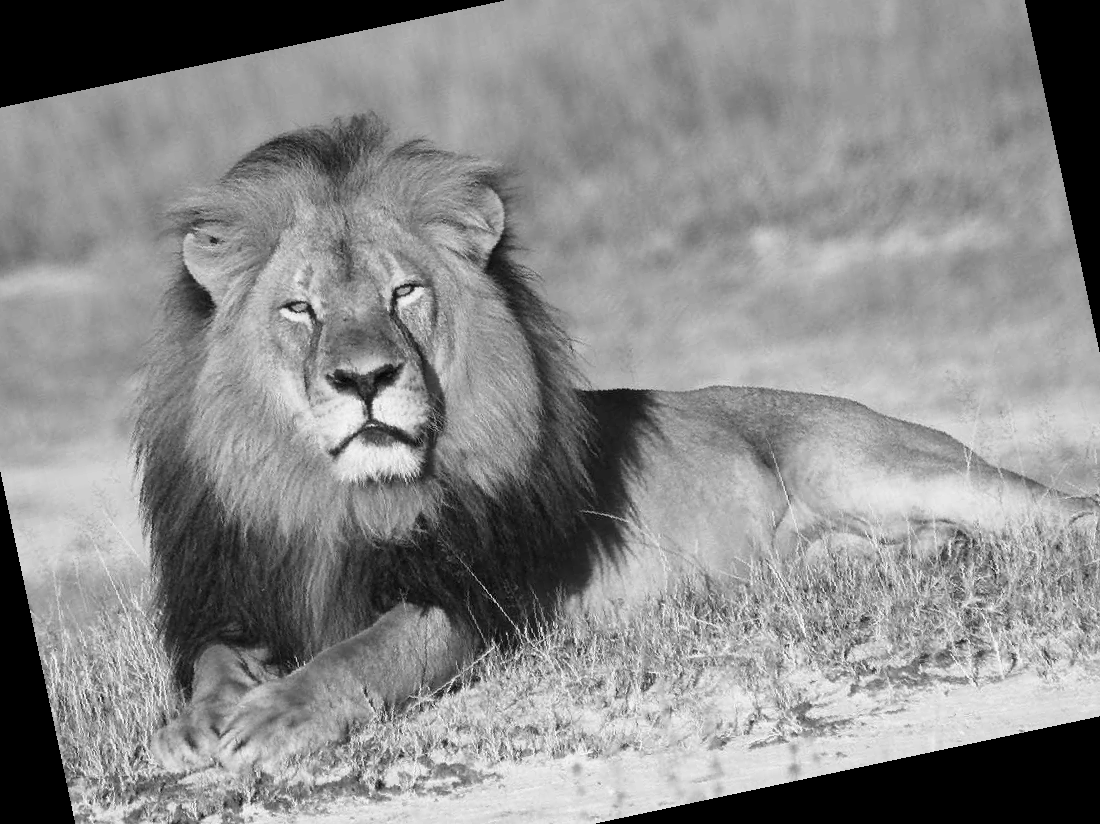

In [ ]:
#Reflect (flip) the original image
##Hint: Use the RandomHorizontalFlip transform
# Apply the RandomHorizontalFlip transform
transform = T.RandomHorizontalFlip(p=0.5)
img = transform(img)

# Save the horizontally flipped image
img.save('flipped_image.jpg')

#show the rotated image
img.show()


##Lion #6

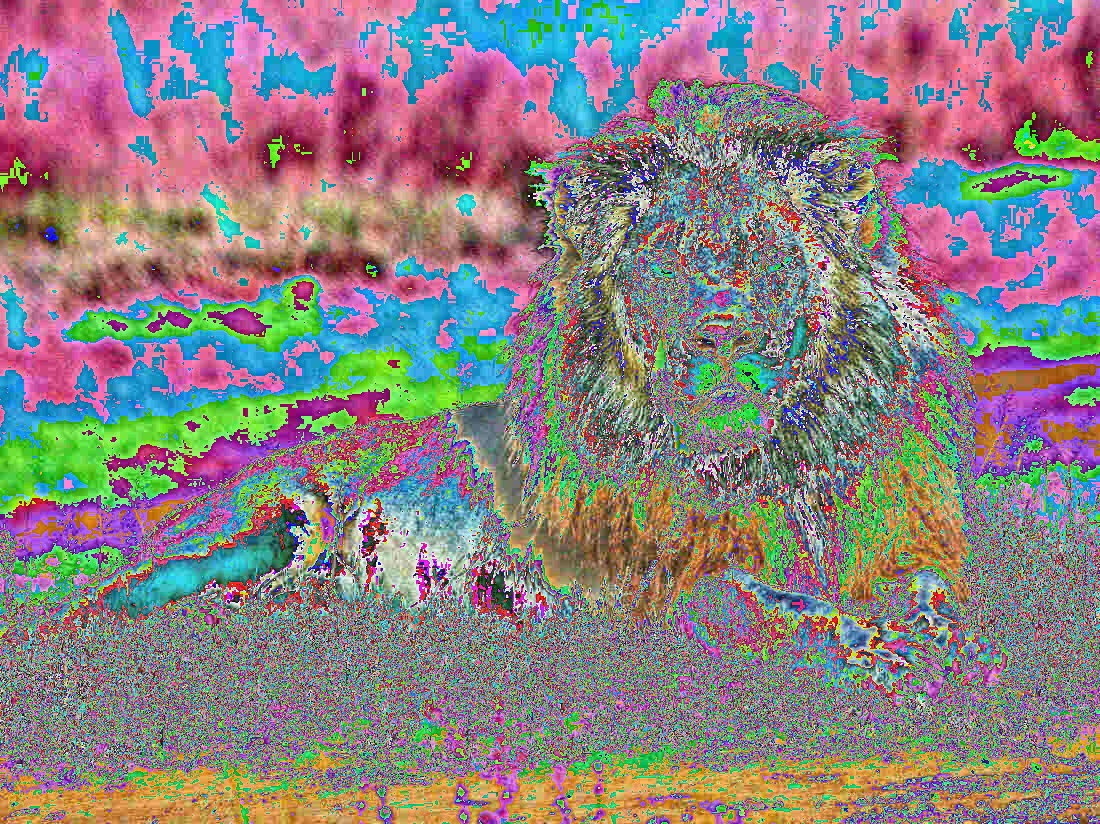

In [ ]:
#Normalize the original image
##Hint: Use the Normalize transform
##Hint: You'll need to convert the image to a Tensor image (and then convert back to a PIL image to display)
##Note: PyTorch uses the means and standard deviations of ImageNet in its documentation


# Convert the image to a tensor image
transform = T.ToTensor()
img_tensor = transform(ImageArray)

# Define the mean and standard deviation of the ImageNet dataset
mean = [0.485]
std = [0.229]

# Normalize the tensor image using the mean and standard deviation
transform = T.Normalize(mean=mean, std=std)
img_tensor = transform(img_tensor)

# Convert the tensor image back to a PIL image for display
transform = T.ToPILImage()
img_normalized = transform(img_tensor)

# Save the normalized image
img_normalized.save('normalized_image.jpg')

img_normalized.show()


##Lion #7

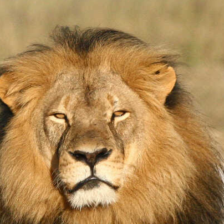

In [ ]:
#Create a pipeline of 3 transformations of your choosing and display your final image
##Hint: Use torch.nn.Sequential class

# Create the pipeline of transformations
pipeline = torch.nn.Sequential(
    T.RandomRotation(30),
    T.RandomResizedCrop(224),
    T.RandomHorizontalFlip(),
)

# Apply the pipeline to the image
output_image = pipeline(img)

# Display the final image
output_image.show()

